In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [91]:
data = pd.read_csv("C:/Users/agraw/Desktop/My projects/Datasets/mail_data.csv")

In [92]:
data.head()

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [93]:
data.tail()

,Category,Message
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


In [94]:
data.shape


(5572, 2)

In [95]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [96]:
data.describe()

,Category,Message
count,5572,5572
unique,2,5157
top,ham,"Sorry, I'll call later"
freq,4825,30


<Axes: >

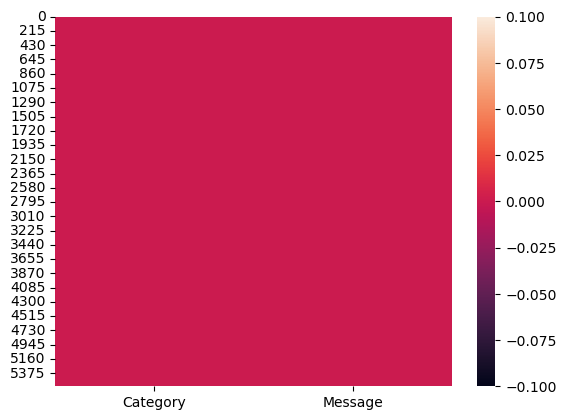

In [97]:
sns.heatmap(data.isnull())

In [98]:
data["Category"] = [1 if value == "spam" else 0 for value in data["Category"]]

In [99]:
data.head()

,Category,Message
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


<Axes: xlabel='Category'>

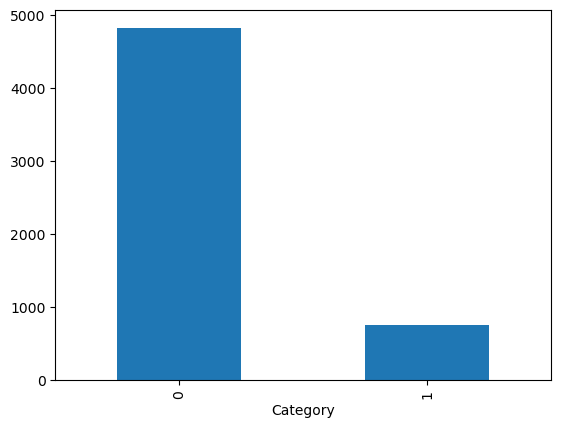

In [100]:
data["Category"]=data["Category"].astype("category",copy = "False")
data["Category"].value_counts().plot(kind = "bar")

In [101]:
from sklearn.model_selection import train_test_split

In [102]:
Y = data["Category"]
X = data["Message"]

In [103]:
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size=0.3,random_state=42)

In [104]:
X_train

708     Quite late lar... Ard 12 anyway i wun b drivin...
4338                        on a Tuesday night r u 4 real
5029    Go chase after her and run her over while she'...
4921     G says you never answer your texts, confirm/deny
2592         Still work going on:)it is very small house.
                              ...                        
3772    Hi, wlcome back, did wonder if you got eaten b...
5191                               Sorry, I'll call later
5226        Prabha..i'm soryda..realy..frm heart i'm sory
5390                           Nt joking seriously i told
860               Did he just say somebody is named tampa
Name: Message, Length: 3900, dtype: object

In [105]:
X_test

3245    Squeeeeeze!! This is christmas hug.. If u lik ...
944     And also I've sorta blown him off a couple tim...
1044    Mmm thats better now i got a roast down me! i...
2484        Mm have some kanji dont eat anything heavy ok
812     So there's a ring that comes with the guys cos...
                              ...                        
2505    Hello, my boytoy! I made it home and my consta...
2525    FREE entry into our £250 weekly comp just send...
4975    Aiyo u so poor thing... Then u dun wan 2 eat? ...
650     You have won ?1,000 cash or a ?2,000 prize! To...
4463    Sorry I flaked last night, shit's seriously go...
Name: Message, Length: 1672, dtype: object

In [106]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [109]:
# transforming the text data to feature vectors that can be used as input in the log reg model
feature_extraction = TfidfVectorizer(min_df = 1, stop_words = 'english', lowercase=True)
X_train_features = feature_extraction.fit_transform(X_train)
X_test_features = feature_extraction.transform(X_test)

# convert y_train and y_test to integer values

Y_train_features = Y_train.astype("int")

Y_test_features = Y_test.astype("int")

In [110]:
from sklearn.linear_model import LogisticRegression


In [111]:
lr = LogisticRegression()


In [113]:
lr.fit(X_train_features,Y_train_features)

LogisticRegression()

In [115]:
prediction = lr.predict(X_test_features)
prediction

array([0, 0, 0, ..., 0, 1, 0])

In [119]:
from sklearn.metrics import accuracy_score

In [122]:
accuracy = accuracy_score(Y_test_features,prediction)
print("Accuracy:",accuracy)

Accuracy: 0.9659090909090909
